In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot

In [16]:
def load_data(df, sequence_length=10, split=0.8):
    data_all = np.array(df).astype(float)    # 轉為浮點型別矩陣
    #print(data_all.shape) # (241,1)
    scaler = MinMaxScaler() #數據標準化
    data_all = scaler.fit_transform(data_all)  # 將數據縮放為 0~1 之間
    data = []
    # data 資料共有 (245-10-1)=234 筆
    for i in range(len(data_all) - sequence_length - 1):
        # 每筆 data 資料有 11 欄
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')

    x = reshaped_data[:, :-1] # 第 1至第10個欄位為 特徵
    y = reshaped_data[:, -1]  # 第 11個欄位為 label
    #print(x.shape,y.shape) # (234,10,1) (234,1)
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary] # 前 80% 為 train 的特徵
    test_x = x[split_boundary:]   # 最後 20% 為 test 的特徵
 
    train_y = y[: split_boundary] # 前 80% 為 train 的 label
    test_y = y[split_boundary:]   # 最後 20% 為 test 的 label

    return train_x, train_y, test_x, test_y, scaler, x, y, reshaped_data

def build_model():
    model = Sequential()     
    # 隱藏層：256 個神經元，input_shape：(10,1)
    # TIME_STEPS=10,INPUT_SIZE=1
    model.add(LSTM(input_shape=(10,1),units=256,unroll=False))
    model.add(Dense(units=1)) # 輸出層：1 個神經元
    #compile:loss, optimizer, metrics
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    return model

def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    try:
        model.fit(train_x, train_y, batch_size=5, epochs=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, )) #轉換為1維矩陣
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict, test_y #傳回 預測值和真實值


Epoch 1/300
3/3 [==============================] - 2s 208ms/step - loss: 0.0669 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 39ms/step - loss: 0.0306 - accuracy: 0.0000e+00 - val_loss: 0.0358 - val_accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0225 - accuracy: 0.0000e+00 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0168 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0165 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 29ms/step - loss: 0.0146 - accuracy: 0.0000e+00 - val_los

Epoch 109/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 110/300
3/3 [==============================] - 0s 28ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 9.7813e-04 - val_accuracy: 0.0000e+00
Epoch 111/300
3/3 [==============================] - 0s 28ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 2.6424e-04 - val_accuracy: 0.0000e+00
Epoch 112/300
3/3 [==============================] - 0s 28ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 6.7309e-04 - val_accuracy: 0.0000e+00
Epoch 113/300
3/3 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 114/300
3/3 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 6.0306e-04 - val_accuracy: 0.0000e+00
Epoch 115/300
3/3 [==============================] - 0s 28ms/step - loss: 0.0019 - a

Epoch 163/300
3/3 [==============================] - 0s 27ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 164/300
3/3 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 165/300
3/3 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 166/300
3/3 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 6.9676e-04 - val_accuracy: 0.0000e+00
Epoch 167/300
3/3 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 168/300
3/3 [==============================] - 0s 25ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 169/300
3/3 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.0

Epoch 217/300
3/3 [==============================] - 0s 27ms/step - loss: 8.1934e-04 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 218/300
3/3 [==============================] - 0s 29ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 219/300
3/3 [==============================] - 0s 28ms/step - loss: 8.1102e-04 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 220/300
3/3 [==============================] - 0s 28ms/step - loss: 8.7016e-04 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 221/300
3/3 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 222/300
3/3 [==============================] - 0s 27ms/step - loss: 8.9944e-04 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 223/300
3/3 [==============================] - 0s 27ms/step - loss: 7.2816e-04

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 38928 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 28204 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 25910 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 30436 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 20729 missing from current font.

/Users/charlie/opt/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 38928 missing from current font.

/Users/cha

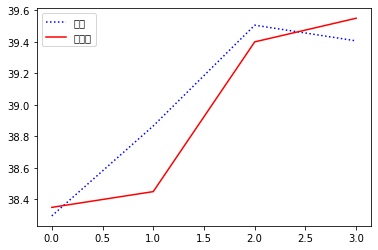

In [17]:
# 主程式
pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告
filename = 'tw6188.csv'
df = pd.read_csv(filename, encoding='big5')  #以pandas讀取檔案
ddprice=pd.DataFrame(df['收盤價'])
    
train_x, train_y, test_x, test_y, scaler, x, y, reshaped_data =load_data(ddprice, sequence_length=10, split=0.8)
# train_x 共 230*0.8=184 筆, test_x 共 230*0.2=46 筆
#print(train_x.shape,train_y.shape) # (184,10,1) (184,1)
#print(test_x.shape,test_y.shape)   # (46,10,1)  (46,1)
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scaler.inverse_transform([[i] for i in predict_y]) # 還原
test_y = scaler.inverse_transform(test_y)  # 還原

plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'])
plt.show()

# 建立 DataFrame，加入 predict_y、test_y，準備以 plotly 繪圖
dd2=pd.DataFrame({"predict":list(predict_y),"label":list(test_y)})
#轉換為 numpy 陣列，並轉為 float
dd2["predict"] = np.array(dd2["predict"]).astype('float64')
dd2["label"] = np.array(dd2["label"]).astype('float64')

data = [
    Scatter(y=dd2["predict"],name='預測'),
    Scatter(y=dd2["label"],name='收盤價')
] 

In [18]:
plot({"data": data, "layout": Layout(title='2020年個股預測圖')},auto_open=True)

'temp-plot.html'